Name:Yuheng Chen

Github Username: YuhengCh

USC ID: 9135161440

In [300]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.cluster import SpectralClustering

## 1.Supervised, Semi-Supervised, and Unsupervised Learning

#### a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [9]:
data = pd.read_csv("../data/Homework_8_data/wdbc.data", header=None)
data.replace({'B' : 0, 'M' : 1}, inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M= 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision,recall,F1-score, and AUC) that you obtain from each algorithm.

In [33]:
positive_data = data[data[1]==1]
negative_data = data[data[1]==0]
positive_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
19,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,0,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,925291,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,925292,0,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,925311,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [24]:
## split 20% test data
test_p = positive_data.sample(frac = 0.2, random_state = 42)
test_n = negative_data.sample(frac = 0.2, random_state = 42)

In [65]:
## a function to get train and test dataset using index
def index_get(whole_data, sample):
    index_train = []
    for x in whole_data.index:
        if x not in sample.index:
            index_train.append(x)
    return index_train
index_p = index_get(positive_data, test_p)
index_n = index_get(negative_data, test_n)
a = index_p + index_n
b = [x for x in test_p.index] +[x for x in test_n.index]
a.sort()
b.sort()
train = data.iloc[a].reset_index()
test = data.iloc[b].reset_index()
train

,index,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,560,925292,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
452,562,925622,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
453,564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
454,567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [75]:
X_train, y_train = train.iloc[:,3:], train[1]
X_test, y_test = test.iloc[:,3:], test[1]

In [78]:
X, y = data.iloc[:,2:], data[1]

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2, random_state = 42)

In [99]:
summaries = {}

#### i.Supervised Learning:Train an L1-penalized SVM to classify the data.Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall,F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [100]:
import warnings
warnings.filterwarnings('ignore')
M = 30
std_scal = StandardScaler()
std_X = std_scal.fit_transform(X)
std_X_train, std_X_test, y_train, y_test = train_test_split(std_X, y,
                                                    stratify=y, 
                                                    test_size=0.2, random_state = 42)

In [118]:
def Supervised_learning(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y, 
                                                    test_size=0.2, random_state = None)
    c_range= [10**c for c in np.arange(-3,7, dtype=float)]
    params = {'C':c_range}
    Linear_SVC = LinearSVC(penalty = 'l1', dual=False, random_state = 42)
    clf = GridSearchCV(Linear_SVC, params, cv=5)
    clf.fit(x_train, y_train)
    best_C = clf.best_params_['C']
    
    print('best c is:' ,best_C)
    
    #build l1svm with best c
    svc = LinearSVC(penalty='l1', dual=False, C=best_C, random_state = 42)
    svc.fit(x_train, y_train)
    
    list1 = []
     # accuracy
    train_accuracy = svc.score(x_train, y_train)
    test_accuracy = svc.score(x_test, y_test)
    list1.append(train_accuracy)
    list1.append(test_accuracy)
    print('train_acc is ', train_accuracy)
    print('test_acc is ', test_accuracy)
    
    # confusion matrix
    y_train_predict = svc.predict(x_train)
    y_test_predict = svc.predict(x_test)
    train_confusion_matrix = confusion_matrix(y_train, y_train_predict)
    test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
    
    # get required values from confusion matrix using ravel
    # source: https://stackoverflow.com/questions/46229965/how-to-make-sklearn-metrics-confusion
    # -matrix-to-always-return-tp-tn-fp-fn
    train_tn, train_fp, train_fn, train_tp = train_confusion_matrix.ravel()
    test_tn, test_fp, test_fn, test_tp = test_confusion_matrix.ravel()
    # precision: p = tp/(tp+fp)
    train_precision = train_tp/(train_tp + train_fp)    
    test_precision = test_tp/(test_tp + test_fp)
    list1.append(train_precision)
    list1.append(test_precision)

    # recall: tp/(tp+fn)
    train_recall = train_tp/(train_tp + train_fn)
    test_recall = test_tp/(test_tp + test_fn)
    list1.append(train_recall)
    list1.append(test_recall)
    
    # f1 = 2 * (P*R)/(P+R)
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    list1.append(train_f1)
    list1.append(test_f1)
    
    # AUC
    train_predict_prob = svc.decision_function(x_train)
    test_predict_prob = svc.decision_function(x_test)
    train_auc = roc_auc_score(y_train, train_predict_prob)
    test_auc = roc_auc_score(y_test, test_predict_prob)
    list1.append(train_auc)
    list1.append(test_auc)
    print('\n')
    return list1
    


In [119]:
cols = ['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision', 'train_recall','test_recall', \
       'train_f1', 'test_f1', 'train_auc', 'test_auc']
table_i = pd.DataFrame(columns=cols, index=range(M))
for i in range(M):
    print('M = ', i+1)
    table_i.loc[i] = Supervised_learning(std_X, y)
print('summary of the performance:\n', table_i.mean())

M =  1
best c is:  1.0
train_acc is  0.989010989010989
test_acc is  0.9649122807017544


M =  2
best c is:  1.0
train_acc is  0.9912087912087912
test_acc is  0.9824561403508771


M =  3
best c is:  0.1
train_acc is  0.989010989010989
test_acc is  0.9912280701754386


M =  4
best c is:  0.1
train_acc is  0.978021978021978
test_acc is  0.9912280701754386


M =  5
best c is:  0.1
train_acc is  0.9846153846153847
test_acc is  0.9736842105263158


M =  6
best c is:  0.1
train_acc is  0.9868131868131869
test_acc is  0.9649122807017544


M =  7
best c is:  1.0
train_acc is  0.9956043956043956
test_acc is  0.9385964912280702


M =  8
best c is:  0.1
train_acc is  0.9846153846153847
test_acc is  0.956140350877193


M =  9
best c is:  0.1
train_acc is  0.989010989010989
test_acc is  0.9824561403508771


M =  10
best c is:  1.0
train_acc is  0.989010989010989
test_acc is  0.9649122807017544


M =  11
best c is:  0.1
train_acc is  0.9824175824175824
test_acc is  0.9824561403508771


M =  12
best c

In [141]:
summaries['supervised_learning'] = table_i.mean()

In [142]:
pd.DataFrame(summaries)

,supervised_learning
train_accuracy,0.987033
test_accuracy,0.969883
train_precision,0.992006
test_precision,0.973170
train_recall,0.973137
test_recall,0.945238
train_f1,0.982453
test_f1,0.958587
train_auc,0.997535
test_auc,0.992119


train_confusion_matrix 
 [[282   3]
 [  6 164]]
test_confusion_matrix 
 [[72  0]
 [ 3 39]]


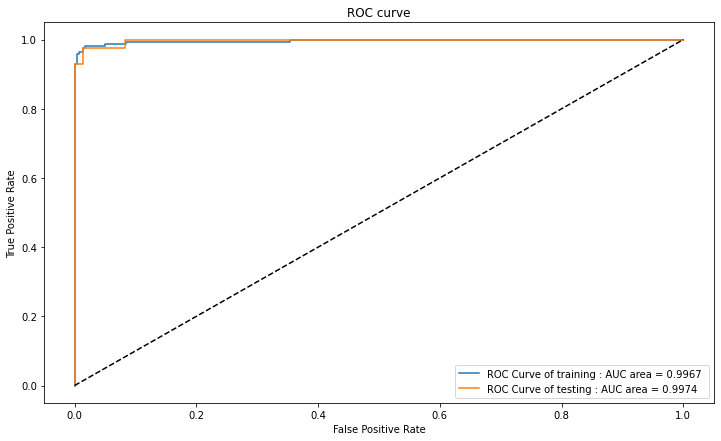

In [129]:
# pick one run
from sklearn import metrics
c_range= [10**c for c in np.arange(-3,7, dtype=float)]
params = {'C':c_range}
Linear_SVC = LinearSVC(penalty = 'l1', dual=False, random_state = 42)
clf = GridSearchCV(Linear_SVC, params, cv=5)
clf.fit(std_X_train, y_train)
best_C = clf.best_params_['C']

#build l1svm with best c
svc = LinearSVC(penalty='l1', dual=False, C=best_C, random_state = 42)
svc.fit(std_X_train, y_train)
y_train_predict = svc.predict(std_X_train)
y_test_predict = svc.predict(std_X_test)
train_confusion_matrix = confusion_matrix(y_train, y_train_predict)
test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
print('train_confusion_matrix \n', train_confusion_matrix)
print('test_confusion_matrix \n', test_confusion_matrix)

train_predict_prob = svc.decision_function(std_X_train)
test_predict_prob = svc.decision_function(std_X_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_predict_prob)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_predict_prob)
fig, axes = plt.subplots(figsize=(12, 7))

# axes.plot(train_fpr, train_tpr, label='train ROC curve')
auc1 = round(metrics.auc(train_fpr, train_tpr), 4)
auc2 = round(metrics.auc(test_fpr, test_tpr), 4)
axes.plot(train_fpr, train_tpr, label="ROC Curve of {} : AUC area = {} ".format('training', auc1))
axes.plot(test_fpr, test_tpr, label="ROC Curve of {} : AUC area = {} ".format('testing', auc2))
axes.plot([0, 1], [0, 1], 'k--')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### ii.Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

#### A.Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation

In [130]:
std_X_train2, std_X_test2, y_train2, y_test2 = train_test_split(std_X, y,
                                                    stratify=y, 
                                                    test_size=0.5, random_state = 42)

In [131]:
c_range= [10**c for c in np.arange(-3,7, dtype=float)]
params = {'C':c_range}
Linear_SVC = LinearSVC(penalty = 'l1', dual=False, random_state = 42)
clf = GridSearchCV(Linear_SVC, params, cv=5)
clf.fit(std_X_train2, y_train2)
best_C = clf.best_params_['C']

#build l1svm with best c
svc = LinearSVC(penalty='l1', dual=False, C=best_C, random_state = 42)
svc.fit(std_X_train2, y_train2)

LinearSVC(dual=False, penalty='l1', random_state=42)

In [234]:
def semiSupervised_learning(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y, 
                                                    test_size=0.5, random_state = None)
    
    
    c_range= [10**c for c in np.arange(-3,7, dtype=float)]
    params = {'C':c_range}
    Linear_SVC = LinearSVC(penalty = 'l1', dual=False, random_state = 42)
    clf = GridSearchCV(Linear_SVC, params, cv=5)
    clf.fit(x_train, y_train)
    best_C = clf.best_params_['C']
    
    print('best c is:' ,best_C)
    
    #build l1svm with best c
    svc = LinearSVC(penalty='l1', dual=False, C=best_C, random_state = 42)
    svc.fit(x_train, y_train)
    
                                                                            
    unlabel_x = x_test                                                                            
    while len(unlabel_x) > 0:
        #Find the unlabeled data point that is the farthest from the SVM decision boundary. 
        distance_from_bound = svc.decision_function(unlabel_x)
        abs_distance = np.abs(distance_from_bound)
        ## get index of max distance point
        index = abs_distance.argmax()
#         print(len(unlabel_x))

        #find label of this point
        label = 0 if distance_from_bound[index] < 0 else 1

        #Add this point back into the training and testing
        label_x = pd.DataFrame(data = x_train)
        unlabel_x = pd.DataFrame(data = unlabel_x)                                                                  
        new_x_train = np.append(label_x, [unlabel_x.iloc[index]], axis = 0)                                                                  
        new_y_train = y_train.append(pd.Series(label))

        #Remove this point from the unlabeled dataframe
        unlabel_x = unlabel_x.drop(unlabel_x.index[index])
#         print(unlabel_x)

        #Retrain the SVM with the updated dataset
        svc.fit(new_x_train, new_y_train)
    
    list1 = []
     # accuracy
    train_accuracy = svc.score(x_train, y_train)
    test_accuracy = svc.score(x_test, y_test)
    list1.append(train_accuracy)
    list1.append(test_accuracy)
    print('train_acc is ', train_accuracy)
    print('test_acc is ', test_accuracy)
    
    # confusion matrix
    y_train_predict = svc.predict(x_train)
    y_test_predict = svc.predict(x_test)
    train_confusion_matrix = confusion_matrix(y_train, y_train_predict)
    test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
    
    # get required values from confusion matrix using ravel
    # source: https://stackoverflow.com/questions/46229965/how-to-make-sklearn-metrics-confusion
    # -matrix-to-always-return-tp-tn-fp-fn
    train_tn, train_fp, train_fn, train_tp = train_confusion_matrix.ravel()
    test_tn, test_fp, test_fn, test_tp = test_confusion_matrix.ravel()
    # precision: p = tp/(tp+fp)
    train_precision = train_tp/(train_tp + train_fp)    
    test_precision = test_tp/(test_tp + test_fp)
    list1.append(train_precision)
    list1.append(test_precision)

    # recall: tp/(tp+fn)
    train_recall = train_tp/(train_tp + train_fn)
    test_recall = test_tp/(test_tp + test_fn)
    list1.append(train_recall)
    list1.append(test_recall)
    
    # f1 = 2 * (P*R)/(P+R)
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    list1.append(train_f1)
    list1.append(test_f1)
    
    # AUC
    train_predict_prob = svc.decision_function(x_train)
    test_predict_prob = svc.decision_function(x_test)
    train_auc = roc_auc_score(y_train, train_predict_prob)
    test_auc = roc_auc_score(y_test, test_predict_prob)
    list1.append(train_auc)
    list1.append(test_auc)
    print('\n')
    return [list1, svc]

In [236]:
cols = ['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision', 'train_recall','test_recall', \
       'train_f1', 'test_f1', 'train_auc', 'test_auc']
table_ii = pd.DataFrame(columns=cols, index=range(M))
for i in range(M):
    print('M = ', i+1)
    a = semiSupervised_learning(std_X, y)
    table_ii.loc[i] = a[0]
print('summary of the performance:\n', table_ii.mean())

M =  1
best c is: 0.1
train_acc is  0.9823943661971831
test_acc is  0.9578947368421052


M =  2
best c is: 0.1
train_acc is  0.9894366197183099
test_acc is  0.9754385964912281


M =  3
best c is: 0.1
train_acc is  0.9788732394366197
test_acc is  0.9824561403508771


M =  4
best c is: 0.1
train_acc is  0.9859154929577465
test_acc is  0.9649122807017544


M =  5
best c is: 1.0
train_acc is  0.9859154929577465
test_acc is  0.9649122807017544


M =  6
best c is: 0.1
train_acc is  0.9894366197183099
test_acc is  0.9754385964912281


M =  7
best c is: 0.1
train_acc is  0.9859154929577465
test_acc is  0.9754385964912281


M =  8
best c is: 1.0
train_acc is  0.9929577464788732
test_acc is  0.9508771929824561


M =  9
best c is: 0.1
train_acc is  0.9823943661971831
test_acc is  0.9649122807017544


M =  10
best c is: 1.0
train_acc is  0.9929577464788732
test_acc is  0.9719298245614035


M =  11
best c is: 1000.0
train_acc is  1.0
test_acc is  0.9614035087719298


M =  12
best c is: 0.1
train_ac

train_confusion_matrix 
 [[282   3]
 [  5 165]]
test_confusion_matrix 
 [[71  1]
 [ 2 40]]


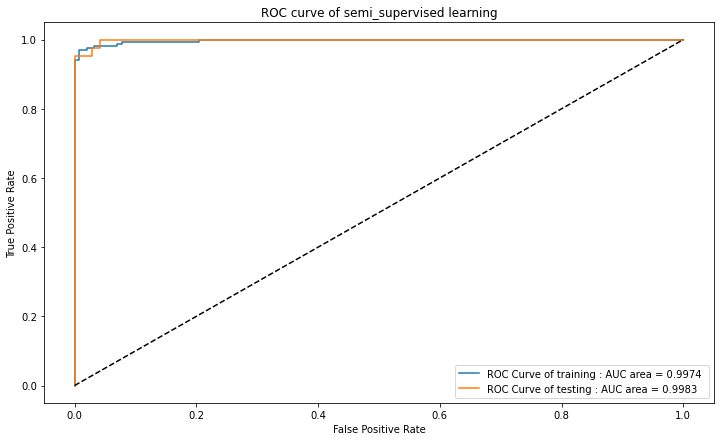

In [238]:
#pick the last run
svc = a[1]
y_train_predict = svc.predict(std_X_train)
y_test_predict = svc.predict(std_X_test)
train_confusion_matrix = confusion_matrix(y_train, y_train_predict)
test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
print('train_confusion_matrix \n', train_confusion_matrix)
print('test_confusion_matrix \n', test_confusion_matrix)

train_predict_prob = svc.decision_function(std_X_train)
test_predict_prob = svc.decision_function(std_X_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_predict_prob)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_predict_prob)
fig, axes = plt.subplots(figsize=(12, 7))

# axes.plot(train_fpr, train_tpr, label='train ROC curve')
auc1 = round(metrics.auc(train_fpr, train_tpr), 4)
auc2 = round(metrics.auc(test_fpr, test_tpr), 4)
axes.plot(train_fpr, train_tpr, label="ROC Curve of {} : AUC area = {} ".format('training', auc1))
axes.plot(test_fpr, test_tpr, label="ROC Curve of {} : AUC area = {} ".format('testing', auc2))
axes.plot([0, 1], [0, 1], 'k--')

plt.title('ROC curve of semi_supervised learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [239]:
summaries['semi-supervised_learning'] = table_ii.mean()

In [240]:
pd.DataFrame(summaries)

,supervised_learning,semi-supervised_learning
train_accuracy,0.987033,0.986854
test_accuracy,0.969883,0.967135
train_precision,0.992006,0.994241
test_precision,0.973170,0.972059
train_recall,0.973137,0.970440
test_recall,0.945238,0.939308
train_f1,0.982453,0.982110
test_f1,0.958587,0.954985
train_auc,0.997535,0.997952
test_auc,0.992119,0.991718


#### iii.Unsupervised Learning:Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k= 2.

#### A.Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

In [243]:
x_train, x_test, y_train, y_test = train_test_split(std_X, y,
                                                    stratify=y, 
                                                    test_size=0.5, random_state = 42)
kmeans = KMeans(n_clusters=2, n_init = 65, random_state = 42).fit(x_train)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

Ans: K-Means should be re-run a few times with different parameters so that the algorithm was not trapped in a local minimum.

#### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall,F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.


#### C.Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall,F1-score, and AUC over Mruns, and ROC and the confusion matrix for one of the runs for the test data

Note: I performed training data and testing data together

In [296]:
x_train, x_test, y_train, y_test = train_test_split(std_X, y,
                                                    stratify=y, 
                                                    test_size=0.2, random_state = 42)

In [297]:
def k_means(x_train, x_test, y_train, y_test):
    kmeans = KMeans(n_clusters=2, n_init = 65, random_state = 42).fit(x_train)
    klabels = kmeans.labels_
    centers = kmeans.cluster_centers_
    index_cluster_0 = np.where(klabels==0)
    index_cluster_1 = np.where(klabels==1)
    indexes = [index_cluster_0, index_cluster_1]
    
    list2 = []
    for i in range(2):
        cluster = np.array(x_train)[indexes[i]]
        labels = np.array(y_train)[indexes[i]]
        distances = np.empty(0)
        for x in cluster:
            d = np.linalg.norm(x - centers[i])
            distances = np.append(distances, d)
        orders = distances.argsort()
        labels = labels[orders[:30]]
        num = np.bincount(labels)
        maj = np.argmax(num)
        list2.append(maj)

    ## training set
    train_pred = klabels
    cluster_0 = list2[0]
    cluster_1 = list2[1]
    train_pred[cluster_0] = cluster_0
    
    train_pred[cluster_1] = cluster_1
    
    ## testing set
    test_labels = kmeans.predict(x_test)
    index_cluster_0_test = np.where(test_labels==0)
    index_cluster_1_test = np.where(test_labels==1)
    
    test_pred = test_labels
    test_pred[index_cluster_0_test] = cluster_0
    test_pred[index_cluster_1_test] = cluster_1
    
    list1 = []
    # accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    list1.append(train_accuracy)
    list1.append(test_accuracy)
#     print('train_acc is ', train_accuracy)
#     print('test_acc is ', test_accuracy)
    
    # confusion matrix
    train_confusion_matrix = confusion_matrix(y_train, train_pred)
    test_confusion_matrix = confusion_matrix(y_test, test_pred)
#     list1.append(train_confusion_matrix)
#     list1.append(test_confusion_matrix)
    
    # get required values from confusion matrix using ravel
    # source: https://stackoverflow.com/questions/46229965/how-to-make-sklearn-metrics-confusion
    # -matrix-to-always-return-tp-tn-fp-fn
    train_tn, train_fp, train_fn, train_tp = train_confusion_matrix.ravel()
    test_tn, test_fp, test_fn, test_tp = test_confusion_matrix.ravel()
    # precision: p = tp/(tp+fp)
    train_precision = train_tp/(train_tp + train_fp)    
    test_precision = test_tp/(test_tp + test_fp)
    list1.append(train_precision)
    list1.append(test_precision)

    # recall: tp/(tp+fn)
    train_recall = train_tp/(train_tp + train_fn)
    test_recall = test_tp/(test_tp + test_fn)
    list1.append(train_recall)
    list1.append(test_recall)
    
    # f1 = 2 * (P*R)/(P+R)
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    list1.append(train_f1)
    list1.append(test_f1)
    
    # AUC
    train_auc = roc_auc_score(y_train, train_pred)
    test_auc = roc_auc_score(y_test, test_pred)
    list1.append(train_auc)
    list1.append(test_auc)
#     print('\n')
    return list1
    


In [298]:
cols = ['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision', 'train_recall','test_recall', \
       'train_f1', 'test_f1', 'train_auc', 'test_auc']
table_iii = pd.DataFrame(columns=cols, index=range(M))
for i in range(M):
#     print('M = ', i+1)
    table_iii.loc[i] = k_means(x_train, x_test, y_train, y_test)
print('summary of the performance:\n', table_iii.mean())

summary of the performance:
 train_accuracy     0.909890
test_accuracy      0.903509
train_precision    0.916129
test_precision     0.942857
train_recall       0.835294
test_recall        0.785714
train_f1           0.873846
test_f1            0.857143
train_auc          0.894840
test_auc           0.878968
dtype: float64


train_confusion_matrix 
 [[272  13]
 [ 28 142]]
test_confusion_matrix 
 [[70  2]
 [ 9 33]]


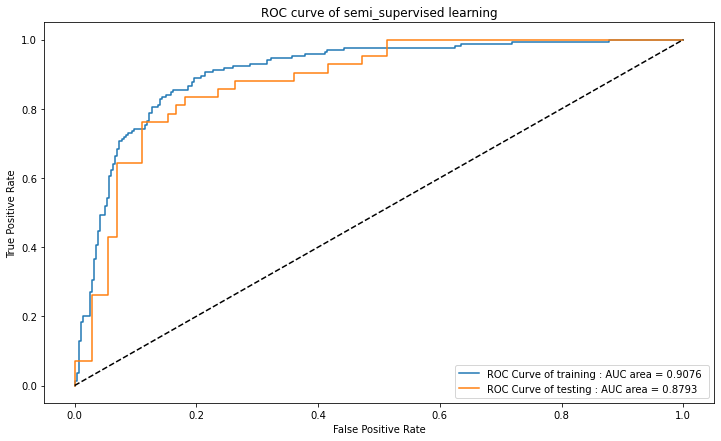

In [299]:
# pick one run
kmeans = KMeans(n_clusters=2, n_init = 65, random_state = 42).fit(x_train)
klabels = kmeans.labels_
centers = kmeans.cluster_centers_
index_cluster_0 = np.where(klabels==0)
index_cluster_1 = np.where(klabels==1)
indexes = [index_cluster_0, index_cluster_1]
    
list2 = []
for i in range(2):
    cluster = np.array(x_train)[indexes[i]]
    labels = np.array(y_train)[indexes[i]]
    distances = np.empty(0)
    for x in cluster:
        d = np.linalg.norm(x - centers[i])
        distances = np.append(distances, d)
    orders = distances.argsort()
    labels = labels[orders[:30]]
    num = np.bincount(labels)
    maj = np.argmax(num)
    list2.append(maj)

## training set
train_pred = klabels
cluster_0 = list2[0]
cluster_1 = list2[1]
train_pred[cluster_0] = cluster_0    
train_pred[cluster_1] = cluster_1
    
## testing set
test_labels = kmeans.predict(x_test)
index_cluster_0_test = np.where(test_labels==0)
index_cluster_1_test = np.where(test_labels==1)
    
test_pred = test_labels
test_pred[index_cluster_0_test] = cluster_0
test_pred[index_cluster_1_test] = cluster_1

train_confusion_matrix = confusion_matrix(y_train, train_pred)
test_confusion_matrix = confusion_matrix(y_test, test_pred)
print('train_confusion_matrix \n', train_confusion_matrix)
print('test_confusion_matrix \n', test_confusion_matrix)

y_pred_train = pd.DataFrame(kmeans.transform(x_train)).iloc[:,0]
y_pred_test = pd.DataFrame(kmeans.transform(x_test)).iloc[:,0]
                            
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_pred_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_pred_test)


fig, axes = plt.subplots(figsize=(12, 7))

# axes.plot(train_fpr, train_tpr, label='train ROC curve')
auc1 = round(metrics.auc(train_fpr, train_tpr), 4)
auc2 = round(metrics.auc(test_fpr, test_tpr), 4)
axes.plot(train_fpr, train_tpr, label="ROC Curve of {} : AUC area = {} ".format('training', auc1))
axes.plot(test_fpr, test_tpr, label="ROC Curve of {} : AUC area = {} ".format('testing', auc2))
axes.plot([0, 1], [0, 1], 'k--')

plt.title('ROC curve of semi_supervised learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show() 

In [301]:
summaries['unsupervised_learning'] = table_iii.mean()
pd.DataFrame(summaries)

,supervised_learning,semi-supervised_learning,unsupervised_learning
train_accuracy,0.987033,0.986854,0.909890
test_accuracy,0.969883,0.967135,0.903509
train_precision,0.992006,0.994241,0.916129
test_precision,0.973170,0.972059,0.942857
train_recall,0.973137,0.970440,0.835294
test_recall,0.945238,0.939308,0.785714
train_f1,0.982453,0.982110,0.873846
test_f1,0.958587,0.954985,0.857143
train_auc,0.997535,0.997952,0.894840
test_auc,0.992119,0.991718,0.878968


#### iv.Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit−predict method.

In [310]:
def Spectral(x_train, x_test, y_train, y_test):
    spectral = SpectralClustering(n_clusters=2, gamma=1, affinity='rbf').fit(x_train)
    labels = spectral.labels_
    # get two clusters center
    index_cluster_0 = np.where(labels==0)
    index_cluster_1 = np.where(labels==1)
    y_train = np.array(y_train)

    cluster_0 = np.argmax(np.bincount(y_train[index_cluster_0]))
    cluster_1 = np.argmax(np.bincount(y_train[index_cluster_1]))

    # training data
    train_pred = labels
    train_pred[cluster_0] = cluster_0
    train_pred[cluster_1] = cluster_1
    
    # testing data
    test_labels = spectral.fit_predict(x_test)
    test_cluster_0 = np.where(test_labels==0)
    test_cluster_1 = np.where(test_labels==1)
    
    test_pred = test_labels
    test_pred[test_cluster_0] = cluster_0
    test_pred[test_cluster_1] = cluster_1
    
    list1 = []
    # accuracy 
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    list1.append(train_accuracy)
    list1.append(test_accuracy)

    # get confusion matrix
    train_confusion_matrix = confusion_matrix(y_train, train_pred)
    train_confusion_matrix = confusion_matrix(y_test, test_pred)
    
    # get required values from confusion matrix using ravel
    # source: https://stackoverflow.com/questions/46229965/how-to-make-sklearn-metrics-confusion
    # -matrix-to-always-return-tp-tn-fp-fn
    train_tn, train_fp, train_fn, train_tp = train_confusion_matrix.ravel()
    test_tn, test_fp, test_fn, test_tp = test_confusion_matrix.ravel()
    # precision: p = tp/(tp+fp)
    train_precision = train_tp/(train_tp + train_fp)    
    test_precision = test_tp/(test_tp + test_fp)
    list1.append(train_precision)
    list1.append(test_precision)

    # recall: tp/(tp+fn)
    train_recall = train_tp/(train_tp + train_fn)
    test_recall = test_tp/(test_tp + test_fn)
    list1.append(train_recall)
    list1.append(test_recall)
    
    # f1 = 2 * (P*R)/(P+R)
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    list1.append(train_f1)
    list1.append(test_f1)
    
    # AUC
    train_auc = roc_auc_score(y_train, train_pred)
    test_auc = roc_auc_score(y_test, test_pred)
    list1.append(train_auc)
    list1.append(test_auc)
#     print('\n')
    return list1

In [312]:
cols = ['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision', 'train_recall','test_recall', \
       'train_f1', 'test_f1', 'train_auc', 'test_auc']
table_iiii = pd.DataFrame(columns=cols, index=range(M))
for i in range(M):
#     print('M = ', i+1)
    table_iiii.loc[i] = Spectral(x_train, x_test, y_train, y_test)
print('summary of the performance:\n', table_iiii.mean())

summary of the performance:
 train_accuracy     0.619853
test_accuracy      0.692982
train_precision    0.903030
test_precision     0.942857
train_recall       0.395238
test_recall        0.785714
train_f1           0.507204
test_f1            0.857143
train_auc          0.503696
test_auc           0.630952
dtype: float64


train_confusion_matrix 
 [[284   1]
 [168   2]]
test_confusion_matrix 
 [[ 0 72]
 [15 27]]


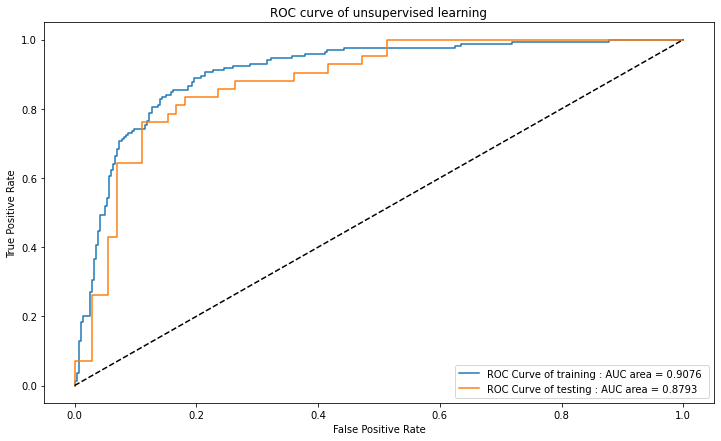

In [313]:
#pick one run
spectral = SpectralClustering(n_clusters=2, gamma=1, affinity='rbf').fit(x_train)
labels = spectral.labels_
# get two clusters center
index_cluster_0 = np.where(labels==0)
index_cluster_1 = np.where(labels==1)
y_train = np.array(y_train)

cluster_0 = np.argmax(np.bincount(y_train[index_cluster_0]))
cluster_1 = np.argmax(np.bincount(y_train[index_cluster_1]))

# training data
train_pred = labels
train_pred[cluster_0] = cluster_0
train_pred[cluster_1] = cluster_1
    
# testing data
test_labels = spectral.fit_predict(x_test)
test_cluster_0 = np.where(test_labels==0)
test_cluster_1 = np.where(test_labels==1)
    
test_pred = test_labels
test_pred[test_cluster_0] = cluster_0
test_pred[test_cluster_1] = cluster_1


train_confusion_matrix = confusion_matrix(y_train, train_pred)
test_confusion_matrix = confusion_matrix(y_test, test_pred)
print('train_confusion_matrix \n', train_confusion_matrix)
print('test_confusion_matrix \n', test_confusion_matrix)

y_pred_train = pd.DataFrame(kmeans.transform(x_train)).iloc[:,0]
y_pred_test = pd.DataFrame(kmeans.transform(x_test)).iloc[:,0]
                            
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_pred_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_pred_test)


fig, axes = plt.subplots(figsize=(12, 7))

# axes.plot(train_fpr, train_tpr, label='train ROC curve')
auc1 = round(metrics.auc(train_fpr, train_tpr), 4)
auc2 = round(metrics.auc(test_fpr, test_tpr), 4)
axes.plot(train_fpr, train_tpr, label="ROC Curve of {} : AUC area = {} ".format('training', auc1))
axes.plot(test_fpr, test_tpr, label="ROC Curve of {} : AUC area = {} ".format('testing', auc2))
axes.plot([0, 1], [0, 1], 'k--')

plt.title('ROC curve of unsupervised learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show() 

#### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods

In [322]:
summaries['unsupervised-Spectral_Cluster'] = table_iiii.mean()
pd.DataFrame(summaries).drop(['Spectral_Cluster'], axis = 1)

,supervised_learning,semi-supervised_learning,unsupervised_learning,unsupervised-Spectral_Cluster
train_accuracy,0.987033,0.986854,0.909890,0.619853
test_accuracy,0.969883,0.967135,0.903509,0.692982
train_precision,0.992006,0.994241,0.916129,0.903030
test_precision,0.973170,0.972059,0.942857,0.942857
train_recall,0.973137,0.970440,0.835294,0.395238
test_recall,0.945238,0.939308,0.785714,0.785714
train_f1,0.982453,0.982110,0.873846,0.507204
test_f1,0.958587,0.954985,0.857143,0.857143
train_auc,0.997535,0.997952,0.894840,0.503696
test_auc,0.992119,0.991718,0.878968,0.630952


Conclusion: From the table we can see that supercised_learning > semi-supercised_learning > unsupervised learning. The performance of supervised_learning and semi-superivsed learning is pretty similiar. The unsupervised learning of spectral cluster perform the worse.

## 2.Active Learning Using Support Vector Machines

#### (a)Download the banknote authentication Data Set. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [323]:
data2 = pd.read_csv('../data/Homework_8_data/data_banknote_authentication.txt', header=None)
data2

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [334]:
x = data2.iloc[:,0:4]
y = data2.iloc[:, -1:]
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y, 
                                                    test_size=472/(472+900), random_state = 42)

#### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

#### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [433]:
## samples to select
df_new = pd.concat([x_train,y_train])
df_x = pd.DataFrame()
df_y = pd.DataFrame()
dfx_whole = x_train.copy()
dfy_whole = y_train.copy()
list_data_x = []
list_data_y = []
i = 0
while len(df_x) < 900:
    if i == 0:
        sample_index = np.random.randint(0, len(dfx_whole), 10)
        select_x = dfx_whole.iloc[sample_index].reset_index(drop=True)
        select_y = dfy_whole.iloc[sample_index].reset_index(drop=True)
    
    
        #drop selected index in the whole dataset
        dfx_whole = dfx_whole.drop(dfx_whole.index[sample_index])
        dfy_whole = dfy_whole.drop(dfy_whole.index[sample_index])
    
    if i != 0:
            new_x = dfx_whole.sample(n=10, replace=False, random_state = None, axis=0)
            sample_index = np.array(new_x.index)
    df_x = pd.concat([df_x, select_x] ,axis=0, ignore_index=True)
    df_y = pd.concat([df_y, select_y] ,axis=0, ignore_index=True)
    list_data_x.append(df_x)
    list_data_y.append(df_y)
#     print(len(df_x), len(df_y))
    
    #drop selected index in the whole dataset
    dfx_whole = dfx_whole.reset_index(drop=True)
    dfy_whole = dfy_whole.reset_index(drop=True)
    df_x = df_x.reset_index(drop=True)
    df_y = df_y.reset_index(drop=True)
    i += 1

In [438]:
def SVM(x_train, y_train, x_test,y_test):
    errors = []
    for i in range(90):
        c_range= [10**c for c in np.arange(-3,7, dtype=float)]
        params = {'C':c_range}
        Linear_SVC = LinearSVC(penalty = 'l1', dual=False, random_state = 42)
        clf = GridSearchCV(Linear_SVC, params, cv=5)
        clf.fit(x_train[i], y_train[i])
        best_C = clf.best_params_['C']

        # Refit the model with the best params
        svc = LinearSVC(penalty='l1', dual=False, C=best_C)
        svc.fit(x_train[i], y_train[i])
        
        errors.append(1-svc.score(x_test, y_test))
#     print(errors[0])
    return errors
# errors = SVM(list_data_x, list_data_y, x_test, y_test)    

In [439]:
passive_error_list = {}
for i in range(50):
    a = SVM(list_data_x, list_data_y, x_test, y_test)
    passive_error_list[i] = a 
    print('m =', i)
    print(a[0])
    print('\n')

m = 0
0.07203389830508478


m = 1
0.14194915254237284


m = 2
0.14406779661016944


m = 3
0.15254237288135597


m = 4
0.10805084745762716


m = 5
0.15466101694915257


m = 6
0.14194915254237284


m = 7
0.05084745762711862


m = 8
0.15254237288135597


m = 9
0.1313559322033898


m = 10
0.14194915254237284


m = 11
0.15677966101694918


m = 12
0.07838983050847459


m = 13
0.12076271186440679


m = 14
0.09957627118644063


m = 15
0.07838983050847459


m = 16
0.08898305084745761


m = 17
0.03813559322033899


m = 18
0.052966101694915224


m = 19
0.10593220338983056


m = 20
0.1292372881355932


m = 21
0.18855932203389836


m = 22
0.1313559322033898


m = 23
0.0423728813559322


m = 24
0.0423728813559322


m = 25
0.11864406779661019


m = 26
0.10805084745762716


m = 27
0.31567796610169496


m = 28
0.14194915254237284


m = 29
0.25


m = 30
0.13347457627118642


m = 31
0.1610169491525424


m = 32
0.17796610169491522


m = 33
0.1716101694915254


m = 34
0.021186440677966156


m = 35
0.114406

In [440]:
pd.DataFrame(passive_error_list)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.072034,0.072034,0.063559,0.027542,0.021186,0.023305,0.023305,0.021186,0.025424,0.027542,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.008475,0.008475,0.008475,0.008475
1,0.141949,0.141949,0.141949,0.086864,0.031780,0.021186,0.025424,0.023305,0.023305,0.027542,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
2,0.144068,0.144068,0.118644,0.105932,0.074153,0.093220,0.021186,0.019068,0.023305,0.025424,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
3,0.152542,0.152542,0.027542,0.027542,0.029661,0.027542,0.023305,0.021186,0.027542,0.025424,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
4,0.108051,0.114407,0.125000,0.052966,0.019068,0.010593,0.014831,0.014831,0.014831,0.012712,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
5,0.154661,0.154661,0.012712,0.021186,0.023305,0.023305,0.021186,0.031780,0.027542,0.027542,...,0.008475,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.008475,0.008475,0.008475
6,0.141949,0.078390,0.019068,0.021186,0.021186,0.029661,0.021186,0.027542,0.012712,0.029661,...,0.014831,0.016949,0.014831,0.014831,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
7,0.050847,0.044492,0.116525,0.027542,0.074153,0.057203,0.057203,0.016949,0.012712,0.010593,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
8,0.152542,0.152542,0.031780,0.031780,0.014831,0.046610,0.014831,0.008475,0.014831,0.010593,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
9,0.131356,0.461864,0.180085,0.014831,0.019068,0.019068,0.014831,0.014831,0.010593,0.012712,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475


#### ii.Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel andL1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors.You have implemented active learning


In [466]:
def active(x_train, y_train, x_test, y_test):
    df_new = pd.concat([x_train,y_train])
    select_x = pd.DataFrame()
    select_y = pd.DataFrame()
    dfx_whole = x_train.copy()
    dfy_whole = y_train.copy()
    list_data_x = []
    list_data_y = []
    while len(select_x) < 1:
        sample_index = np.random.randint(0, len(dfx_whole), 10)
        select_x = dfx_whole.iloc[sample_index]
        select_y = dfy_whole.iloc[sample_index]
    select_x = select_x.reset_index(drop=True)
    select_y = select_y.reset_index(drop=True)
    #drop selected index in the whole dataset
    dfx_whole = dfx_whole.drop(dfx_whole.index[sample_index])
    dfy_whole = dfy_whole.drop(dfy_whole.index[sample_index])
    
    
    dfx_whole = dfx_whole.reset_index(drop=True)
    dfy_whole = dfy_whole.reset_index(drop=True)

    
    
    errors = []
    for i in range(90):
        c_range= [10**c for c in np.arange(-3,7, dtype=float)]
        params = {'C':c_range}
        Linear_SVC = LinearSVC(penalty = 'l1', dual=False, random_state = 42)
        clf = GridSearchCV(Linear_SVC, params, cv=5)
        clf.fit(select_x, select_y)
        best_C = clf.best_params_['C']

        # Refit the model with the best params
        svc = LinearSVC(penalty='l1', dual=False, C=best_C)
        svc.fit(select_x, select_y)
        
        errors.append(1-svc.score(x_test, y_test))
        
        if i > 0:
            distances = svc.decision_function(dfx_whole)
            sample_index = np.argsort(abs(distances))[:10]
        
            select_x = pd.concat([select_x, dfx_whole.iloc[sample_index]],axis=0, ignore_index=True)
            select_y = pd.concat([select_y, dfy_whole.iloc[sample_index]],axis=0, ignore_index=True)
            # drop selected indexes
            dfx_whole = dfx_whole.drop(dfx_whole.index[sample_index])
            dfy_whole = dfy_whole.drop(dfy_whole.index[sample_index])
            #reset index
            dfx_whole = dfx_whole.reset_index(drop=True)
            dfy_whole = dfy_whole.reset_index(drop=True)
    return errors

In [468]:
turn2 = list()
for i in range(50):
    b = active(x_train, y_train, x_test, y_test)
    turn2.append(b)
    print('m =', i)
    print(b[0])
    print('\n')


m = 0
0.1292372881355932


m = 1
0.05508474576271183


m = 2
0.14406779661016944


m = 3
0.13771186440677963


m = 4
0.0826271186440678


m = 5
0.0423728813559322


m = 6
0.03601694915254239


m = 7
0.1716101694915254


m = 8
0.13983050847457623


m = 9
0.1271186440677966


m = 10
0.1271186440677966


m = 11
0.10381355932203384


m = 12
0.11440677966101698


m = 13
0.14194915254237284


m = 14
0.44491525423728817


m = 15
0.11652542372881358


m = 16
0.07203389830508478


m = 17
0.13347457627118642


m = 18
0.2838983050847458


m = 19
0.14406779661016944


m = 20
0.11228813559322037


m = 21
0.03601694915254239


m = 22
0.44491525423728817


m = 23
0.44491525423728817


m = 24
0.06567796610169496


m = 25
0.1228813559322034


m = 26
0.09533898305084743


m = 27
0.11652542372881358


m = 28
0.08686440677966101


m = 29
0.163135593220339


m = 30
0.0826271186440678


m = 31
0.336864406779661


m = 32
0.14406779661016944


m = 33
0.3707627118644068


m = 34
0.13559322033898302


m = 35
0.

In [469]:
pd.DataFrame(turn2)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.129237,0.129237,0.042373,0.038136,0.023305,0.019068,0.012712,0.012712,0.010593,0.012712,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
1,0.055085,0.055085,0.019068,0.019068,0.008475,0.008475,0.008475,0.008475,0.010593,0.012712,...,0.008475,0.008475,0.008475,0.010593,0.010593,0.012712,0.012712,0.010593,0.012712,0.012712
2,0.144068,0.144068,0.055085,0.033898,0.021186,0.012712,0.023305,0.021186,0.019068,0.008475,...,0.010593,0.010593,0.010593,0.008475,0.010593,0.008475,0.008475,0.012712,0.012712,0.008475
3,0.137712,0.137712,0.031780,0.129237,0.023305,0.069915,0.025424,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
4,0.082627,0.088983,0.033898,0.025424,0.006356,0.008475,0.006356,0.012712,0.010593,0.008475,...,0.012712,0.012712,0.012712,0.010593,0.010593,0.012712,0.008475,0.008475,0.008475,0.008475
5,0.042373,0.042373,0.038136,0.008475,0.008475,0.078390,0.016949,0.008475,0.010593,0.010593,...,0.012712,0.012712,0.012712,0.012712,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
6,0.036017,0.036017,0.023305,0.050847,0.019068,0.014831,0.010593,0.008475,0.012712,0.008475,...,0.010593,0.012712,0.012712,0.010593,0.012712,0.010593,0.010593,0.010593,0.010593,0.012712
7,0.171610,0.171610,0.008475,0.069915,0.038136,0.029661,0.021186,0.016949,0.006356,0.008475,...,0.008475,0.010593,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
8,0.139831,0.139831,0.036017,0.008475,0.008475,0.014831,0.012712,0.019068,0.008475,0.012712,...,0.012712,0.012712,0.008475,0.012712,0.012712,0.008475,0.012712,0.008475,0.008475,0.008475
9,0.127119,0.127119,0.029661,0.012712,0.019068,0.008475,0.008475,0.010593,0.008475,0.008475,...,0.012712,0.012712,0.012712,0.012712,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475


#### c)Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation

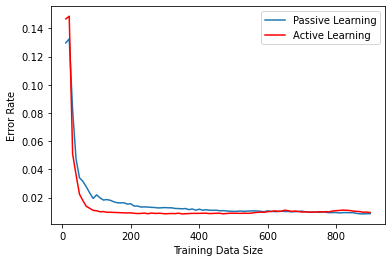

In [484]:
range_plt = np.arange(10, 910, 10)
plt.plot(range_plt, pd.DataFrame(passive_error_list).mean() ,label='Passive Learning')
plt.plot(range_plt, pd.DataFrame(turn2).mean(), c='r', label='Active Learning')
plt.xlabel('Training Data Size')
plt.ylabel('Error Rate')
plt.legend()
plt.show()


Conclusion: We can see from the graph that passive learning has better performance when the size of the trainind data is small. As the size become large, the passvie and active learning will have same performace.